In [72]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [73]:
src_dir_path = '/home/hwkang/dev-TSB-AD/TSB-AD/scores'
src_dataset_dir_path = '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M'

In [74]:
keywords_to_include_model = [
    '048_ParallelSNN', '051_ParallelSNN', '029_CNN'
]

In [75]:
dir_names = os.listdir(src_dir_path)
dir_names = [d for d in dir_names if any(keyword in d for keyword in keywords_to_include_model)]
dir_names.sort()
dir_paths = [os.path.join(src_dir_path, d) for d in dir_names]

In [76]:
keyowrds_to_include_ts = [
    '051_GHL', '055_GHL', '034_GHL', '036_GHL', '042_GHL', '046_GHL',
    '065_SMD', '073_SMD', '078_SMD', '115_PSM', '130_OPPORTUNITY', '144_SMAP', '173_GECCO'
]

In [77]:
dataset_file_names = os.listdir(src_dataset_dir_path)
dataset_file_names = [f for f in dataset_file_names if any(keyword in f for keyword in keyowrds_to_include_ts)]
dataset_file_names.sort()
dataset_file_paths = [os.path.join(src_dataset_dir_path, f) for f in dataset_file_names]

In [78]:
# Initialize a dictionary with keywords as keys and empty lists as values
score_paths_dict = {keyword: [] for keyword in keyowrds_to_include_ts}

In [79]:
for dir_path in dir_paths:
    file_names = os.listdir(dir_path)
    for file_name in file_names:
            if any(keyword in file_name for keyword in keyowrds_to_include_ts):
                file_path = os.path.join(dir_path, file_name)
                target_keyword = file_name.split('_')[0] + '_' + file_name.split('_')[1]
                score_paths_dict[target_keyword].append(file_path)

In [80]:
def plot_scores(file_paths, label_path, normalize=False):
    scores = []
    for file_path in file_paths:
        score = np.load(file_path)
        # Normalize the score if needed
        if normalize:
            score = (score - np.min(score)) / (np.max(score) - np.min(score))
        scores.append(score)

    df = pd.read_csv(label_path)
    label = df.iloc[:, -1].values

    plt.figure(figsize=(20, 8))
    for i, (score, file_path) in enumerate(zip(scores, file_paths)):
        model_name = file_path.split('/')[-2]
        plt.plot(score, label=f'{model_name}', alpha=0.7)

    # Represent the 'label' as a red background
    for i in range(len(label)):
        if label[i] == 1:  # Anomaly
            plt.axvspan(i, i + 1, color='lightgrey', alpha=0.5)

    plt.legend()
    ts_name = label_path.split('/')[-1].split('.')[0]
    plt.title(ts_name)
    plt.show()

In [81]:
def plot_scores_sep(file_paths, label_path, normalize=False):
    scores = []
    for file_path in file_paths:
        score = np.load(file_path)
        # Normalize the score if needed
        if normalize:
            score = (score - np.min(score)) / (np.max(score) - np.min(score))
        scores.append(score)

    df = pd.read_csv(label_path)
    label = df.iloc[:, -1].values

    n = len(scores)
    ncols = 2
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(14, 3*nrows),
                             sharex=True, sharey=True)
    axes = axes.flatten()

    for ax, (score, fp) in zip(axes, zip(scores, file_paths)):
        #print(fp)
        model_name = fp.split('/')[-2]
        ax.plot(score, alpha=0.8)
        # 이상 구간 회색 음영
        for i in np.where(label==1)[0]:
            ax.axvspan(i, i+1, color='lightgrey', alpha=0.3)
        ax.set_title(model_name)
    # 빈 축은 끄기
    for ax in axes[n:]:
        ax.axis('off')

    fig.tight_layout()
    ts_name = label_path.split('/')[-1].split('.')[0]
    plt.suptitle(ts_name)
    # suptitle 공간 확보
    plt.subplots_adjust(top=0.9)
    plt.show()

In [82]:
def plot_wrapper(ts_name, normalize=False, sep=True):
    label_path = [path for path in dataset_file_paths if ts_name in path][0]
    file_paths = score_paths_dict[ts_name]
    
    if not file_paths:
        print(f"No score files found for {ts_name}.")
        return
    
    if sep:
        plot_scores_sep(file_paths, label_path, normalize=normalize)
    else:
        plot_scores(file_paths, label_path, normalize=normalize)

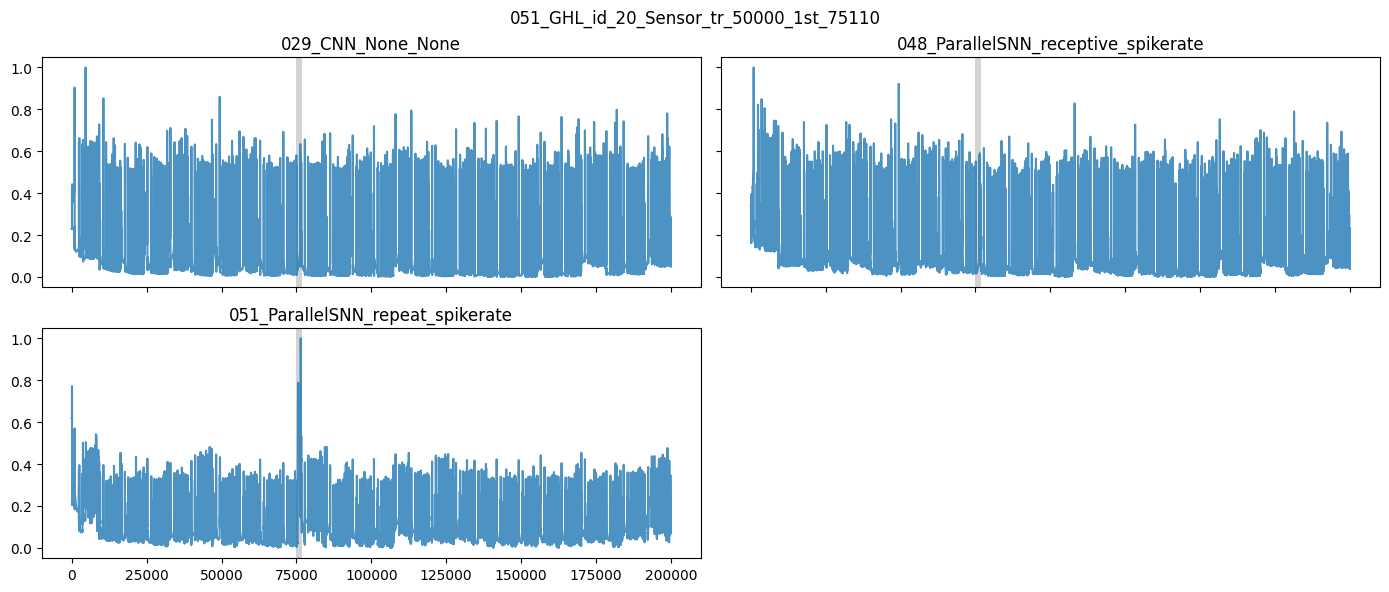

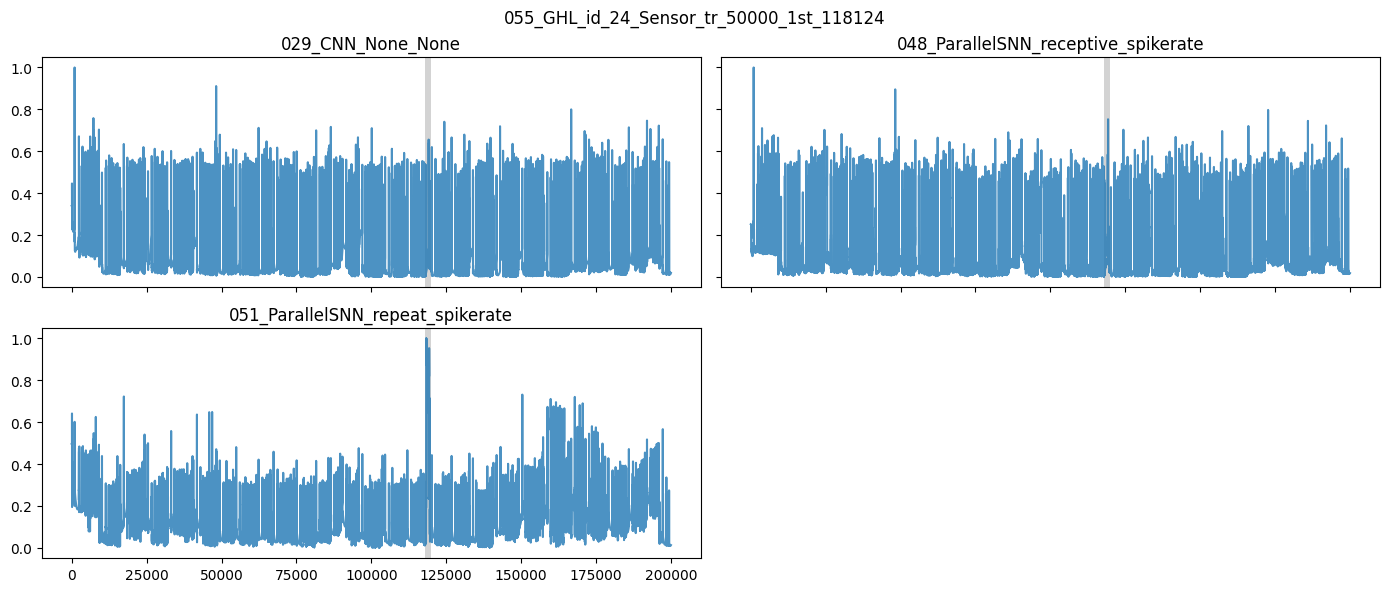

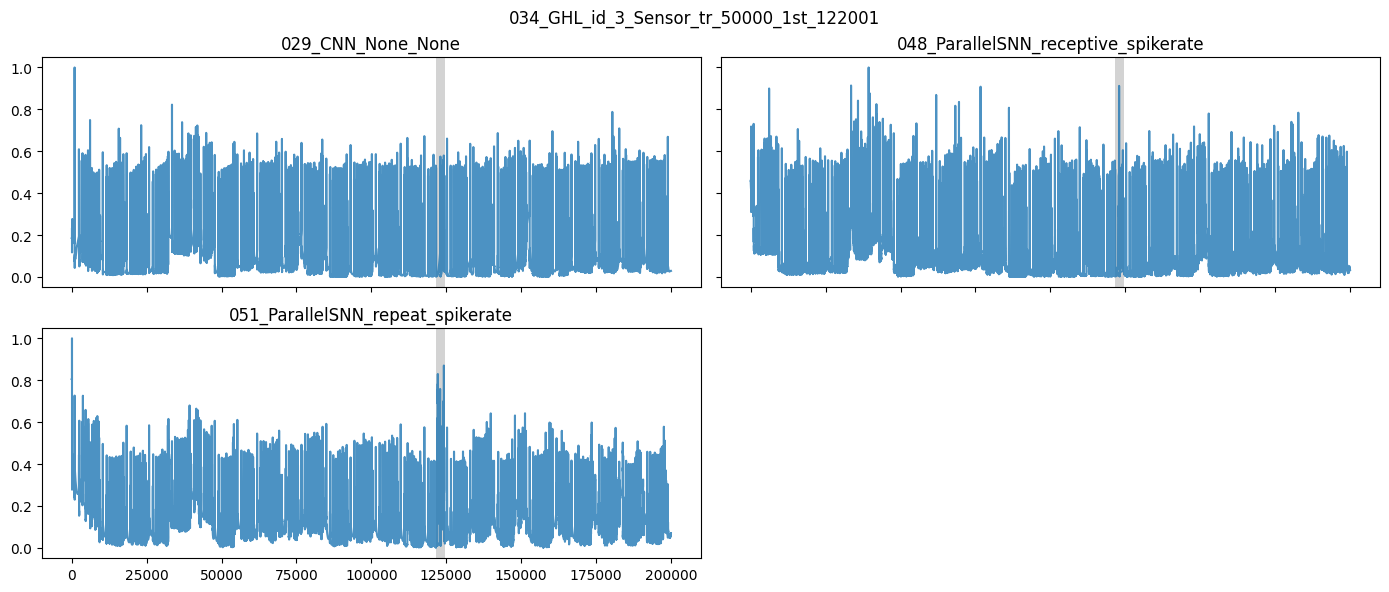

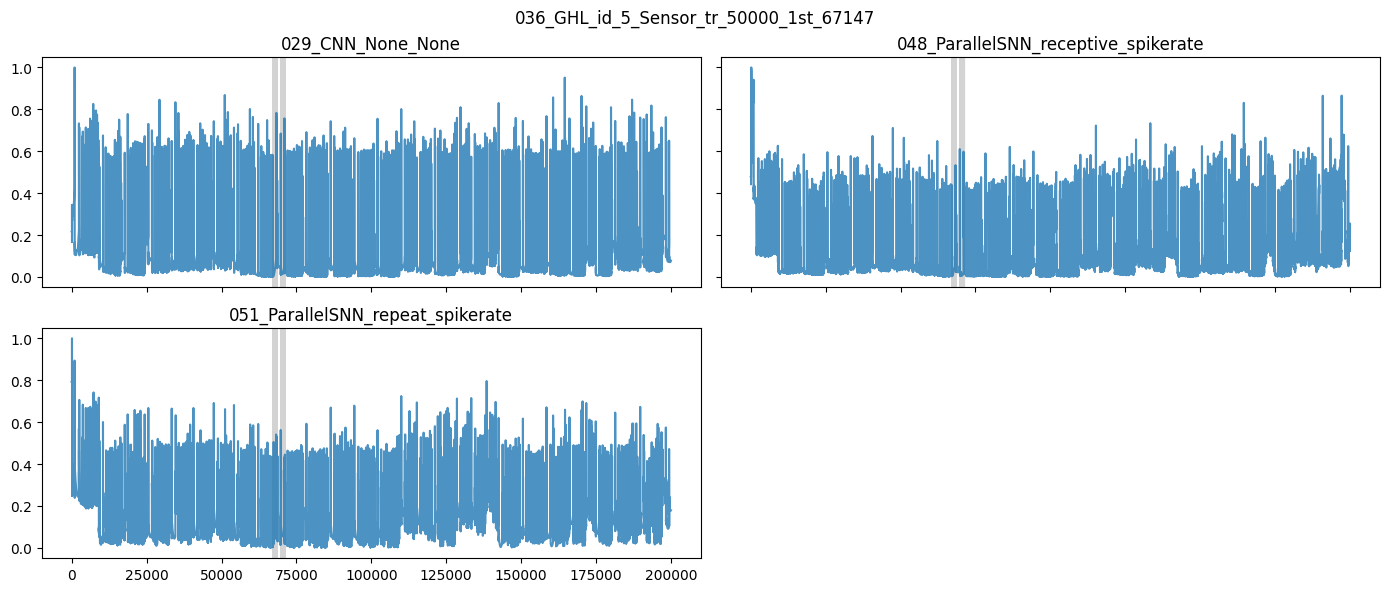

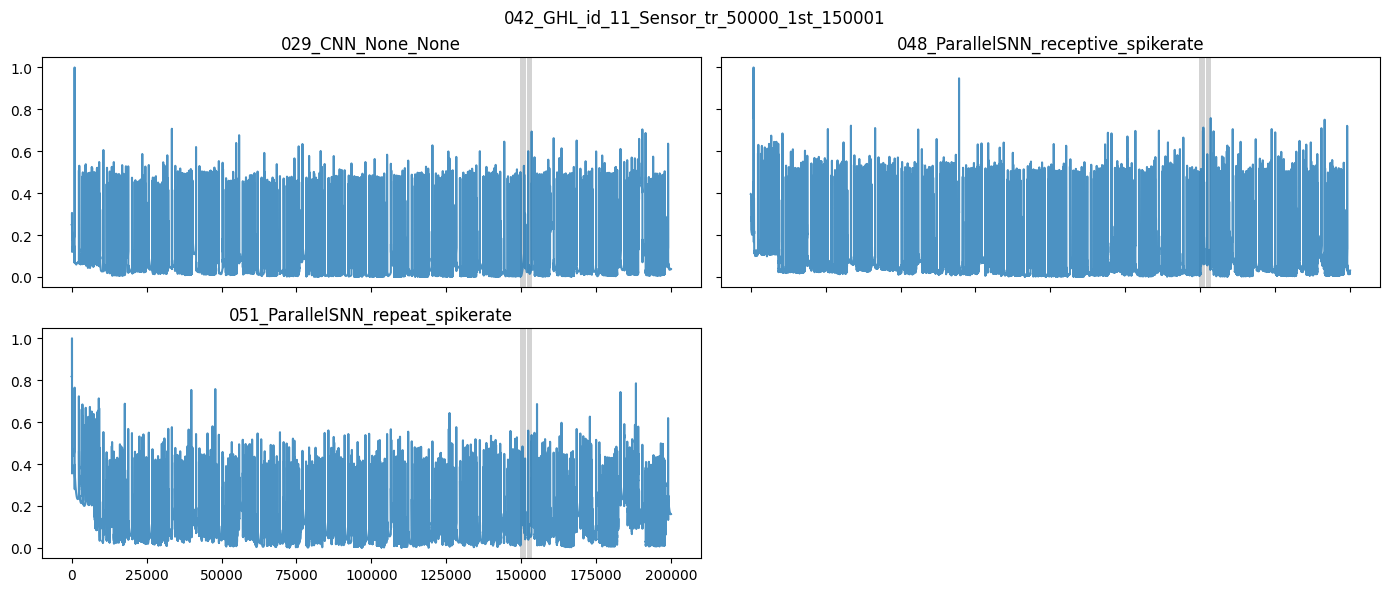

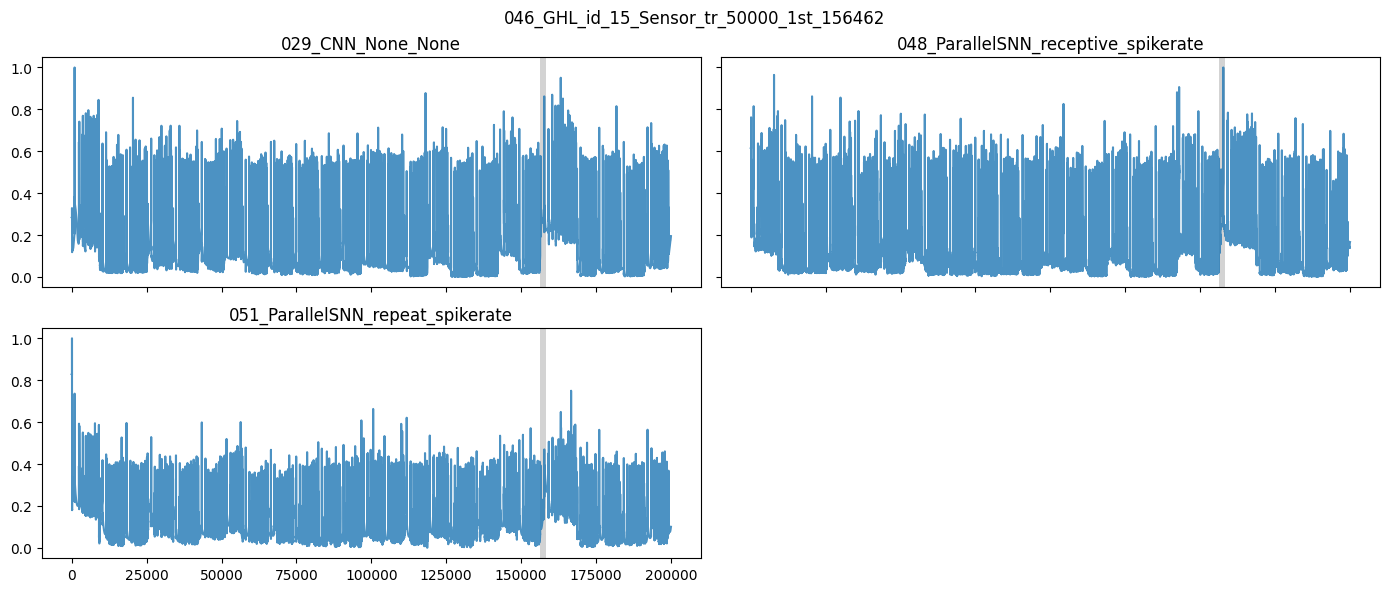

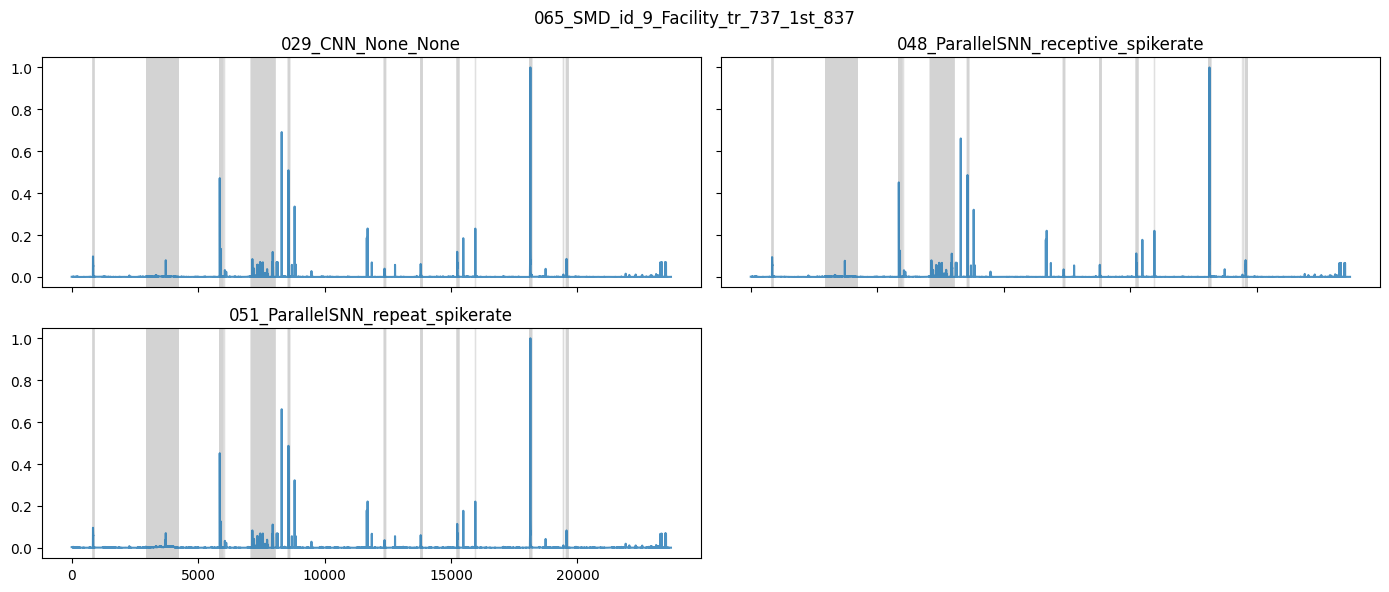

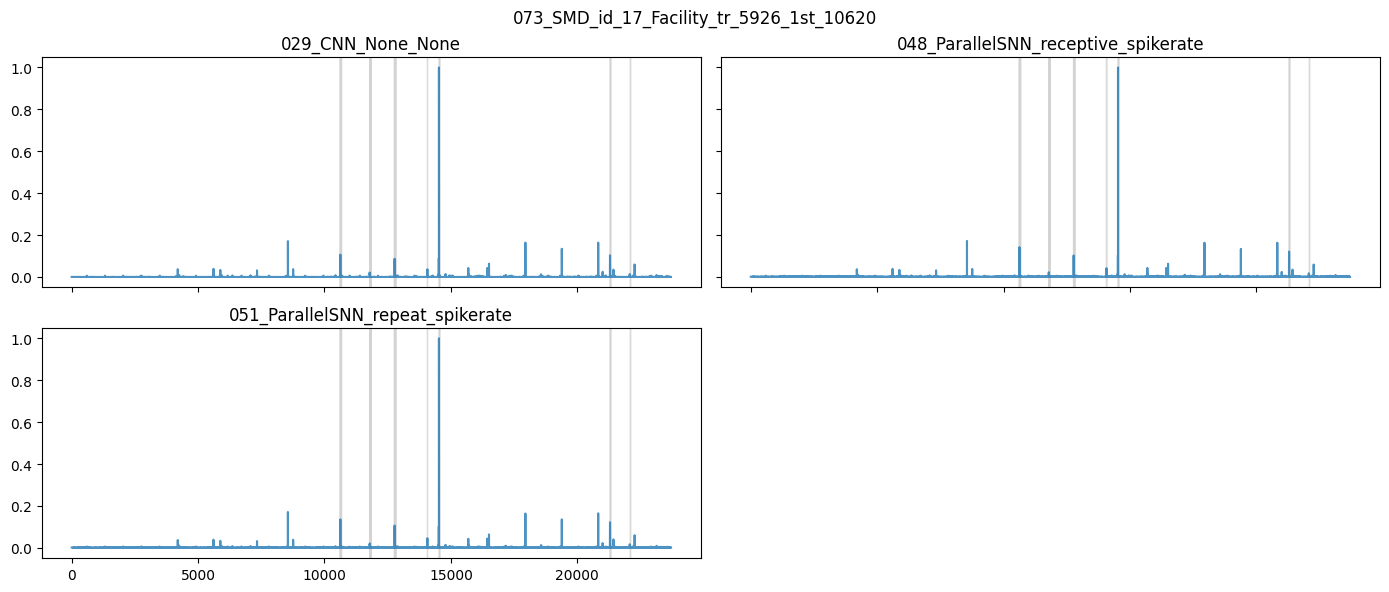

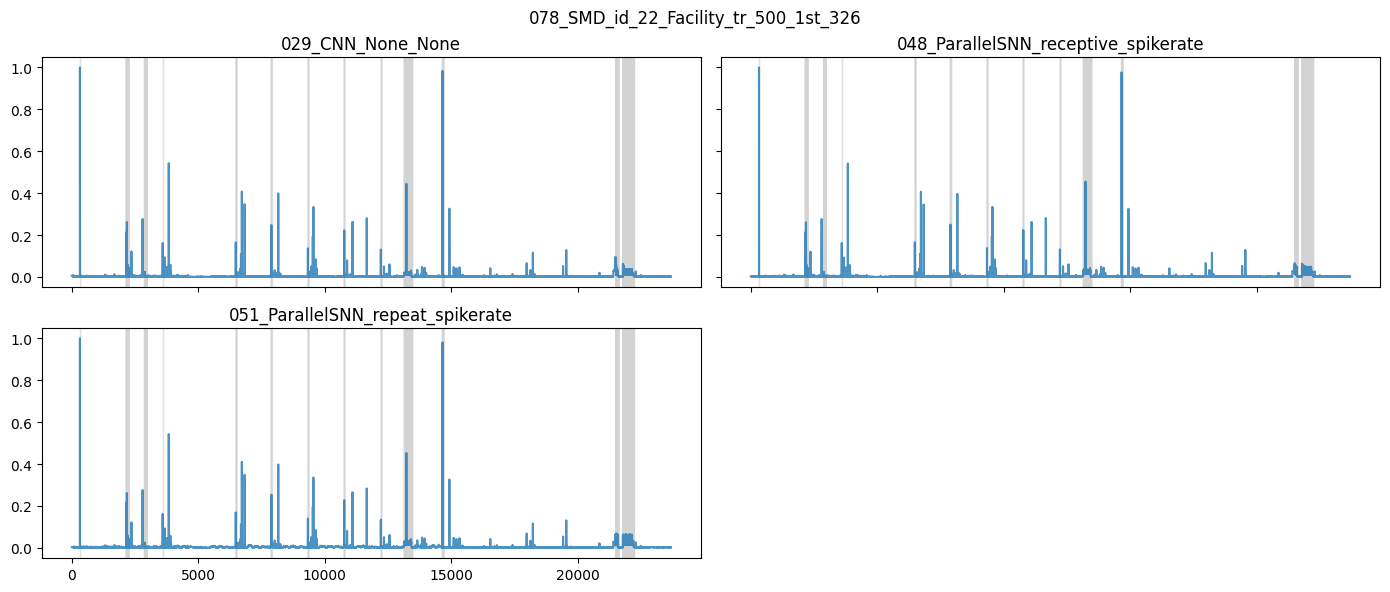

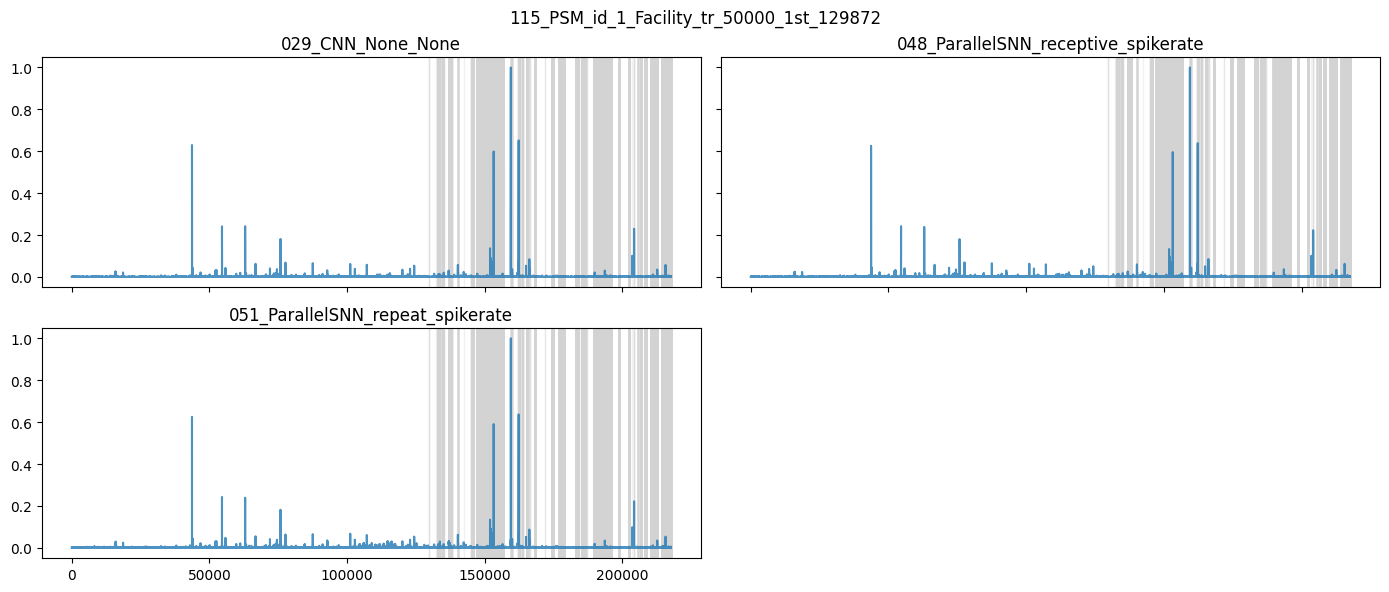

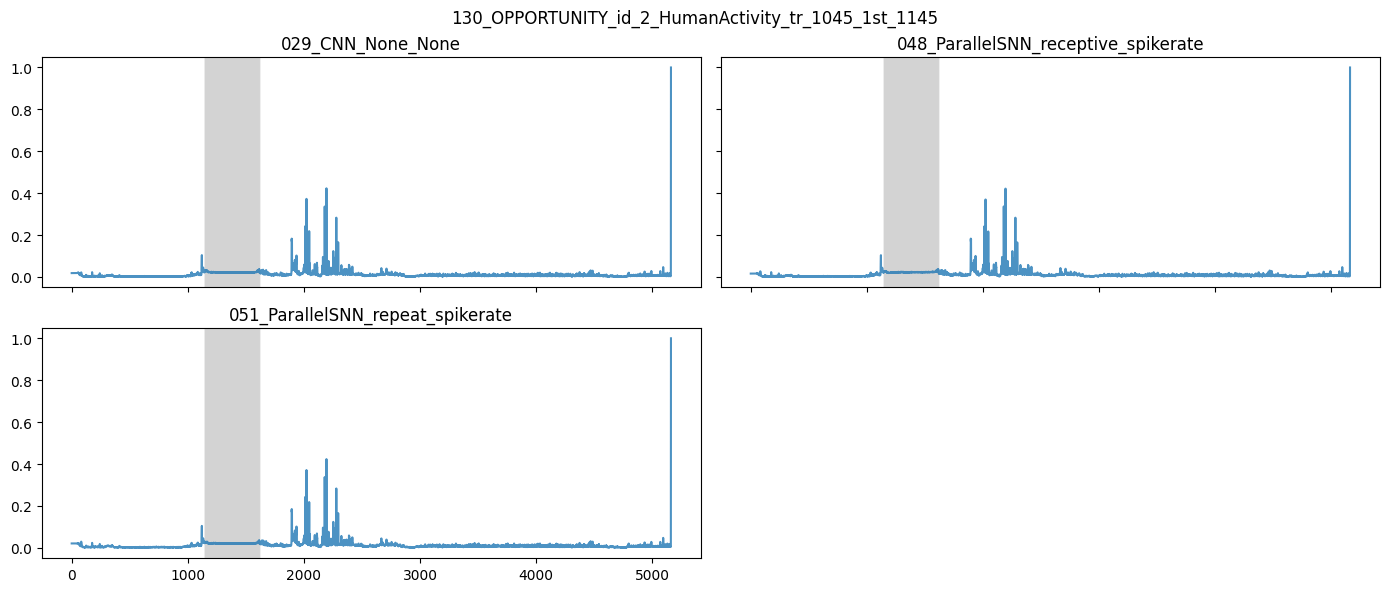

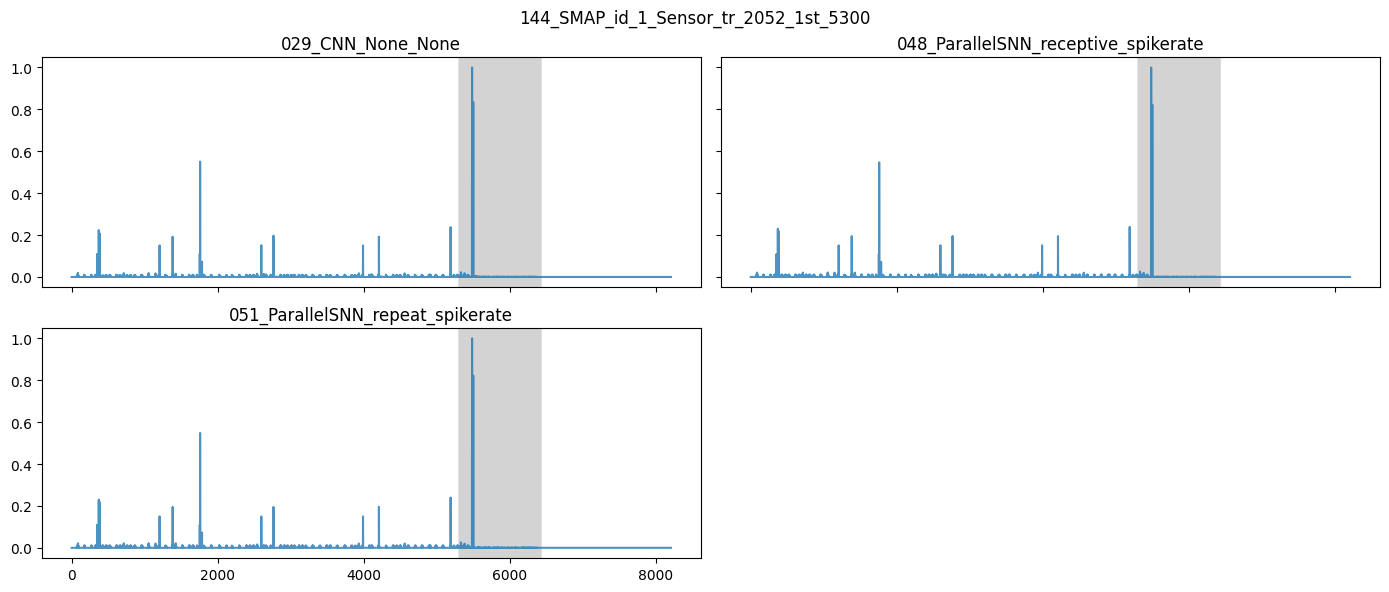

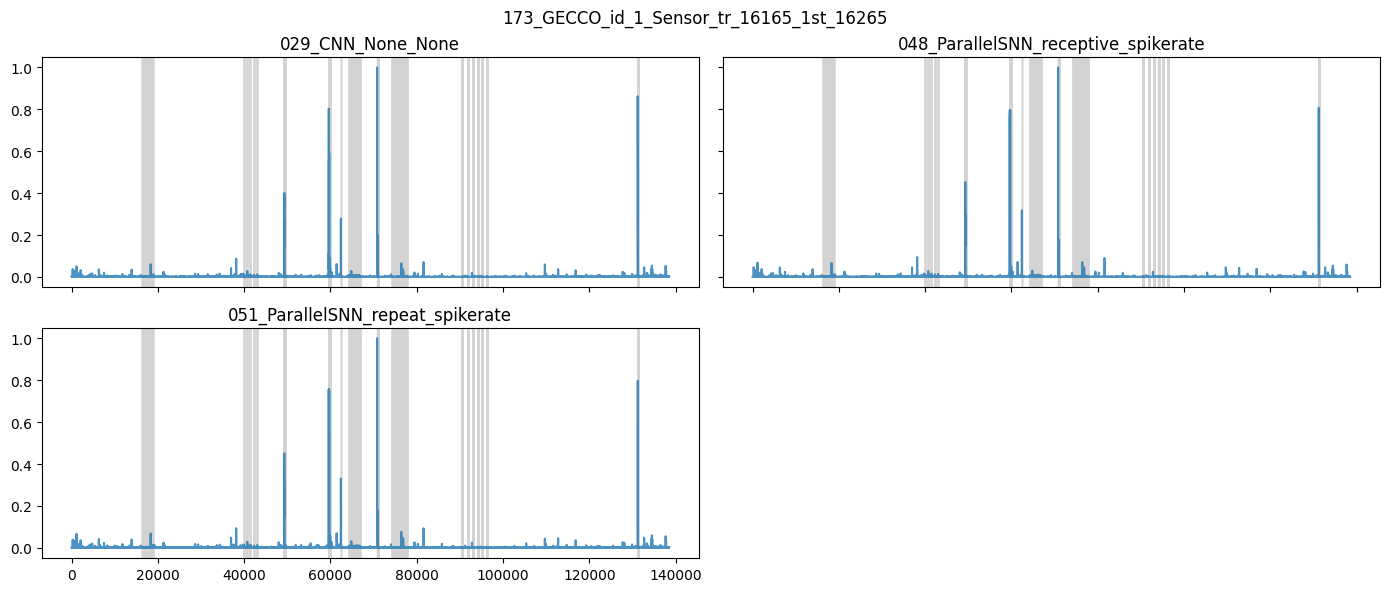

In [83]:
normalize = True
sep=True

for ts_name in keyowrds_to_include_ts:
    plot_wrapper(ts_name, normalize=normalize, sep=sep)


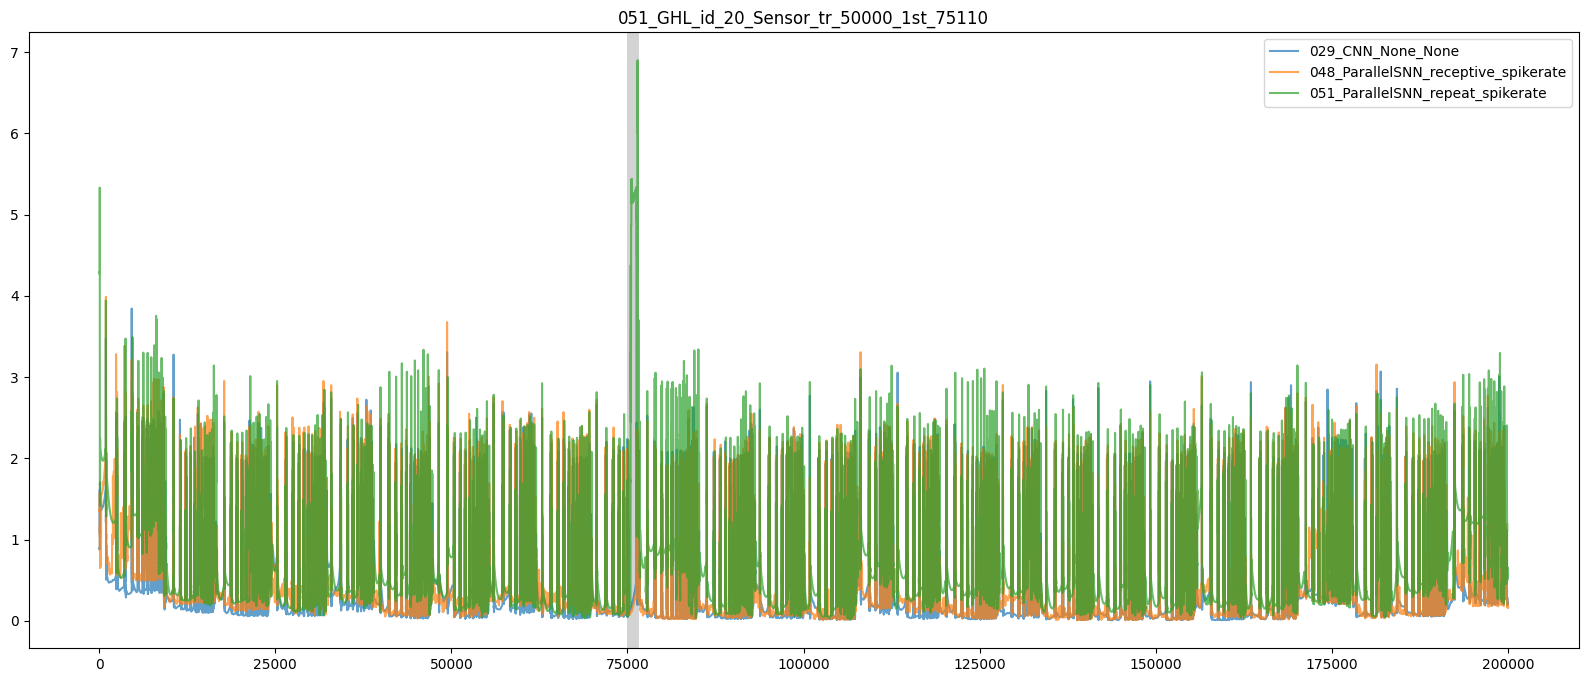

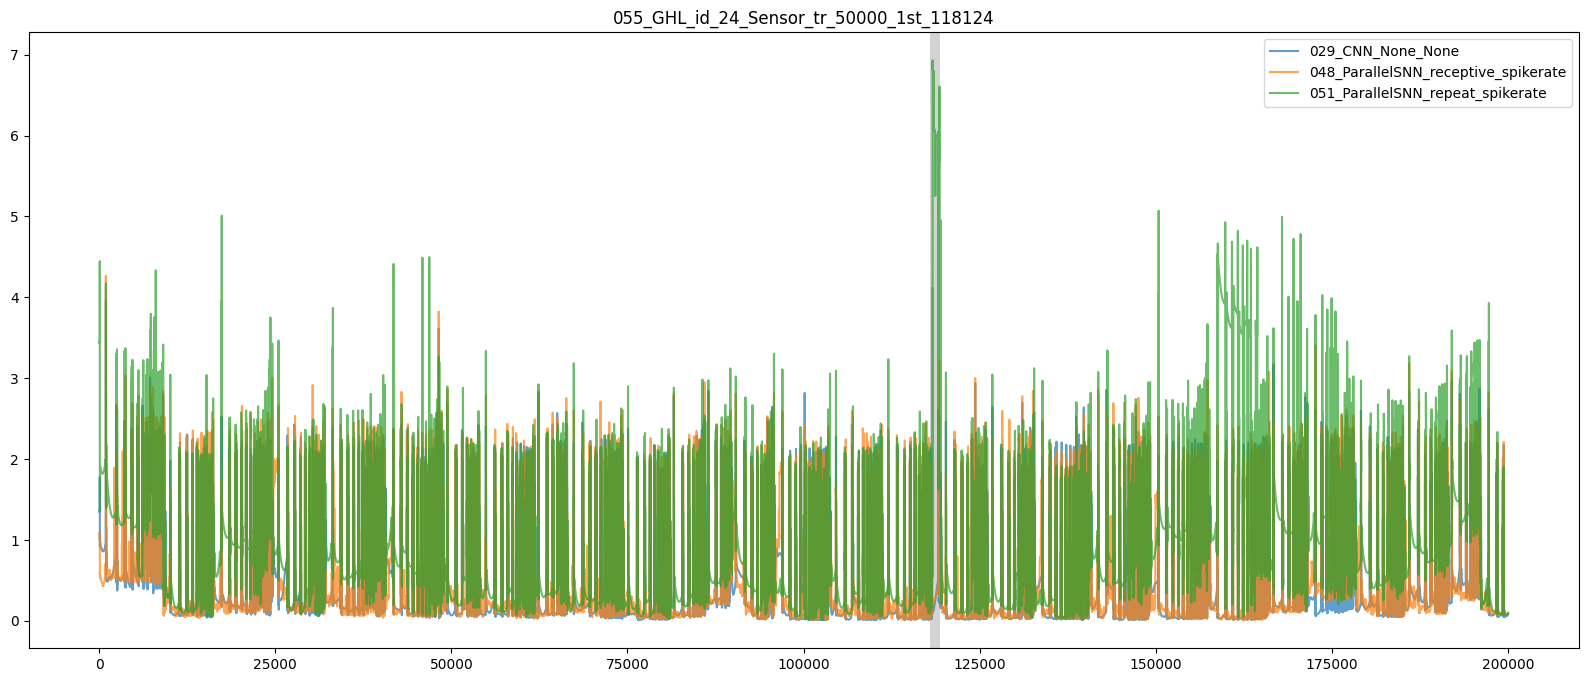

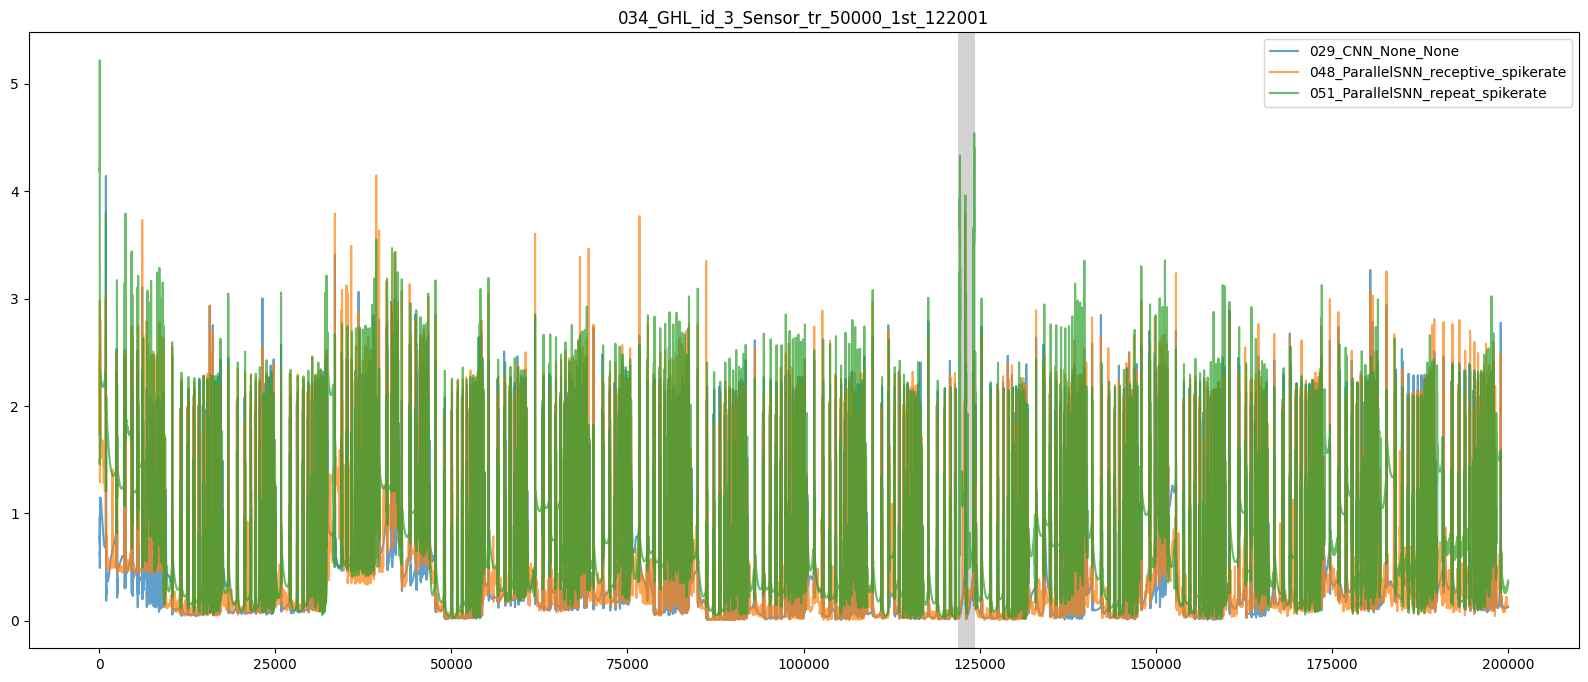

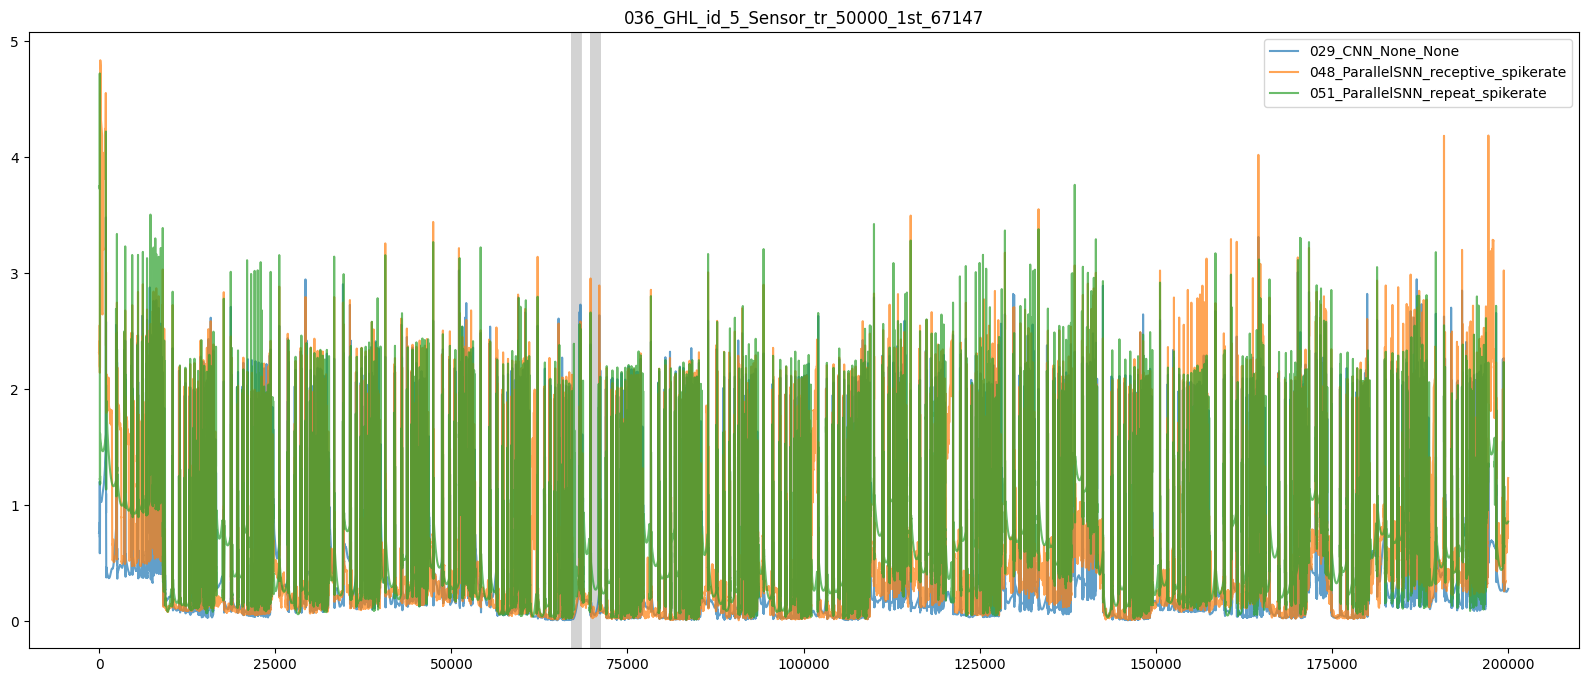

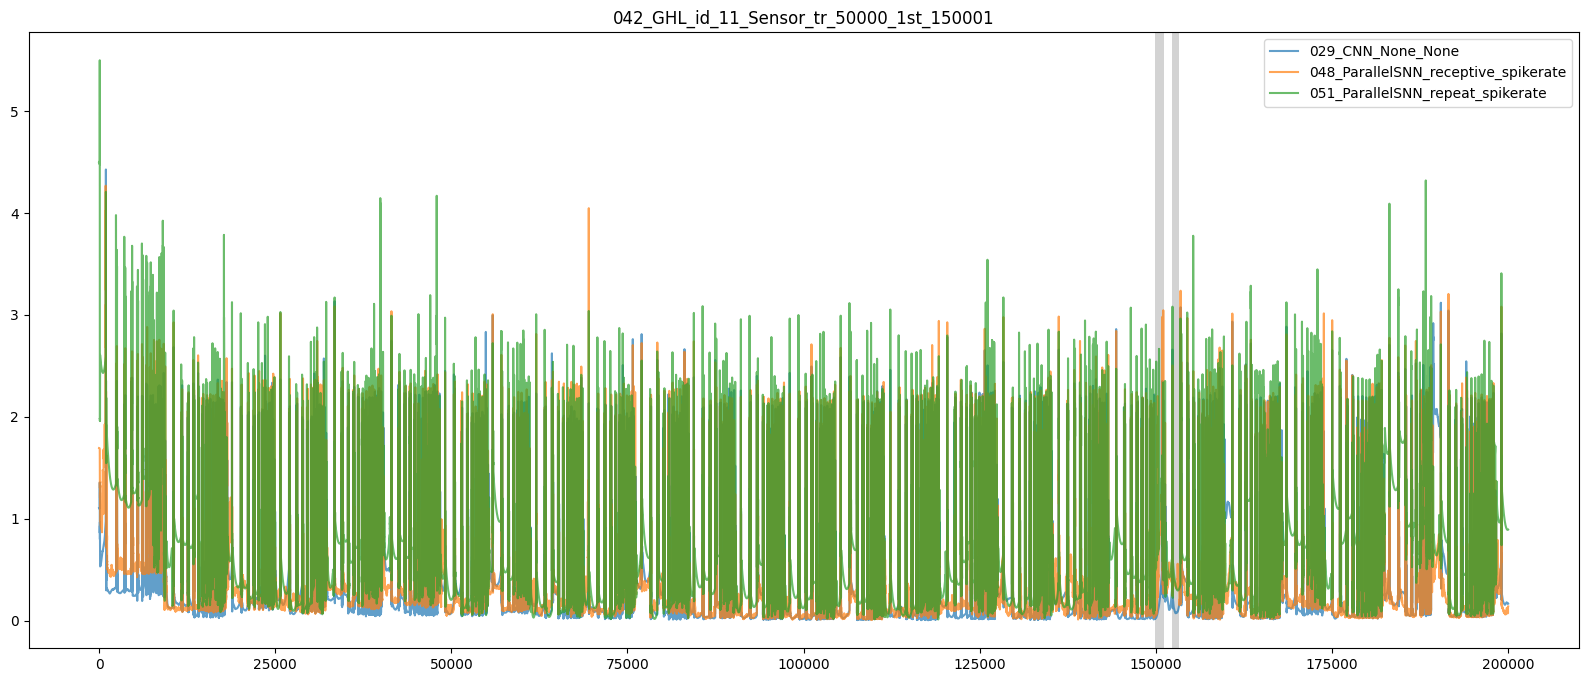

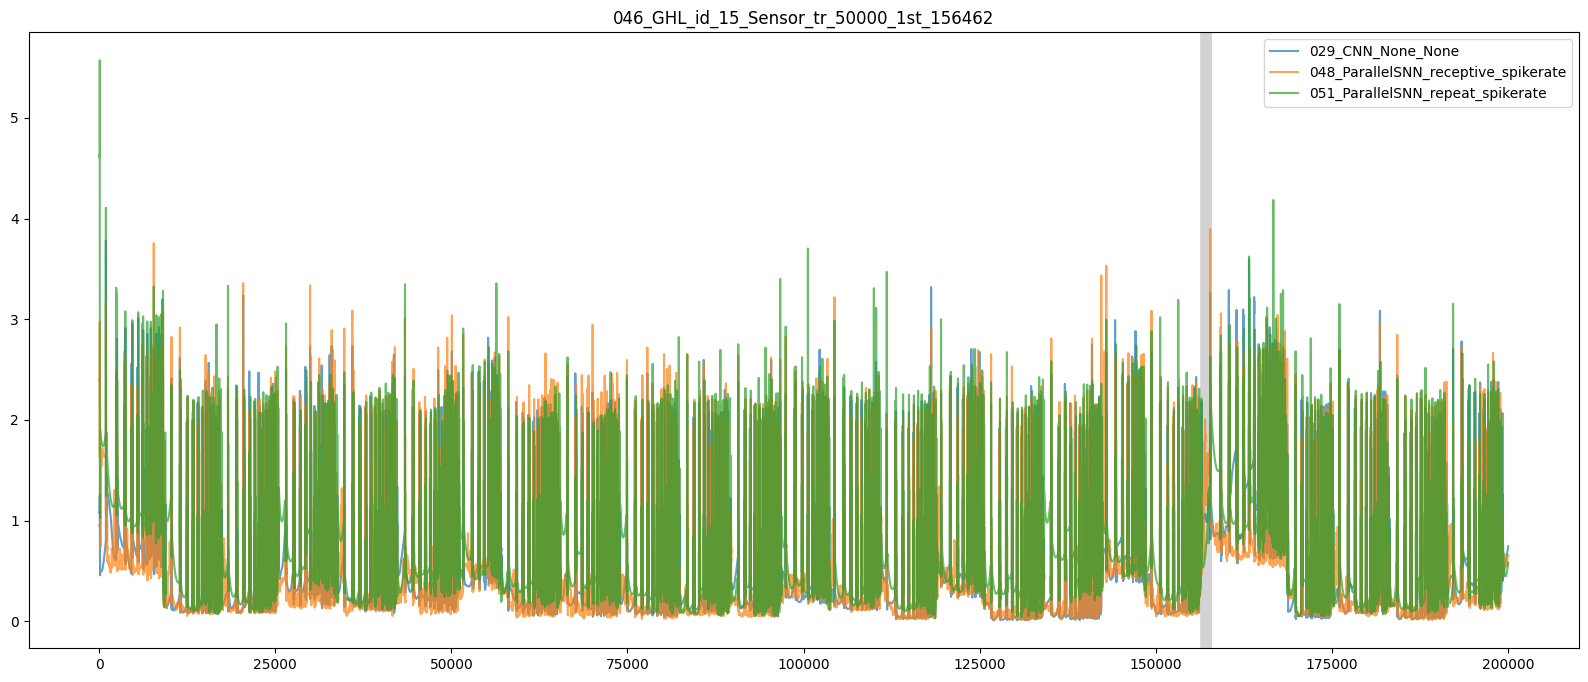

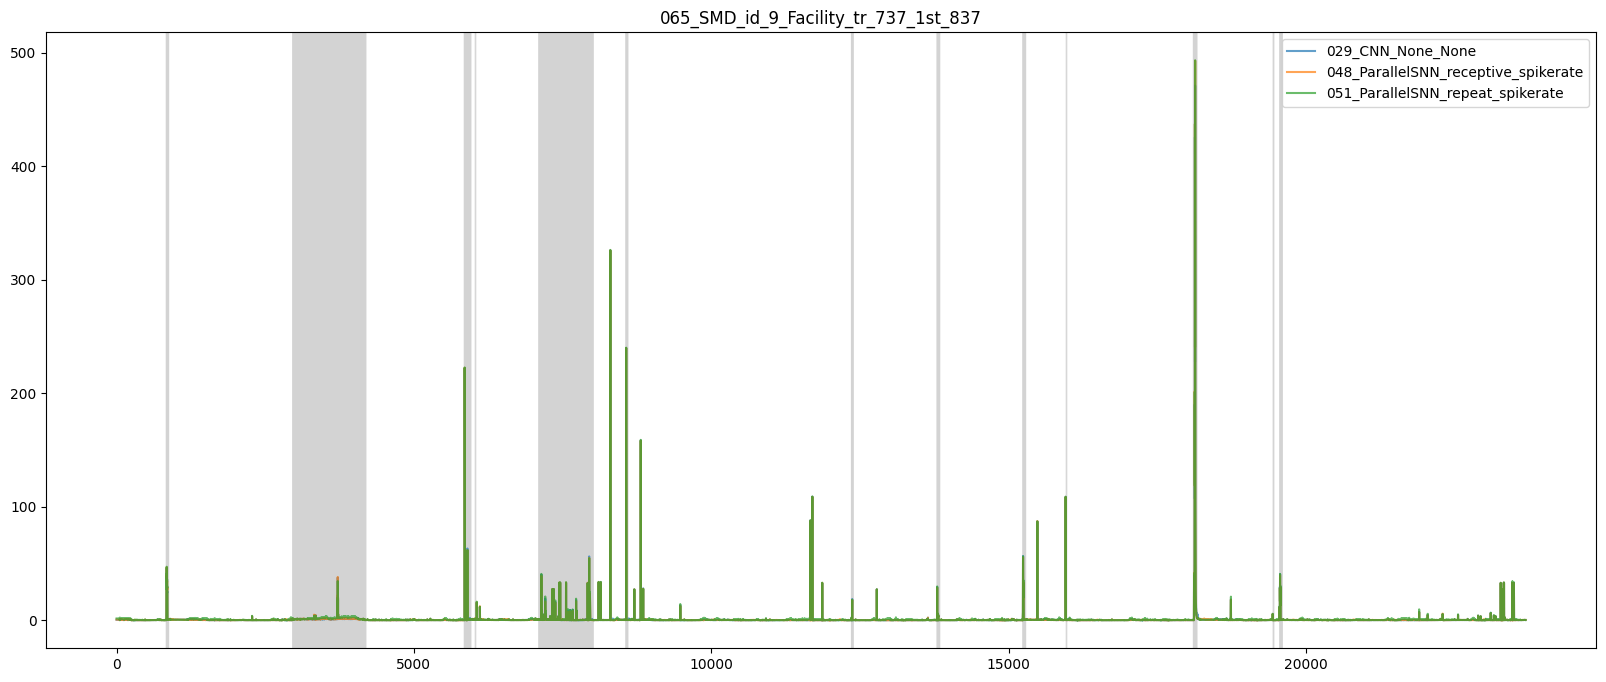

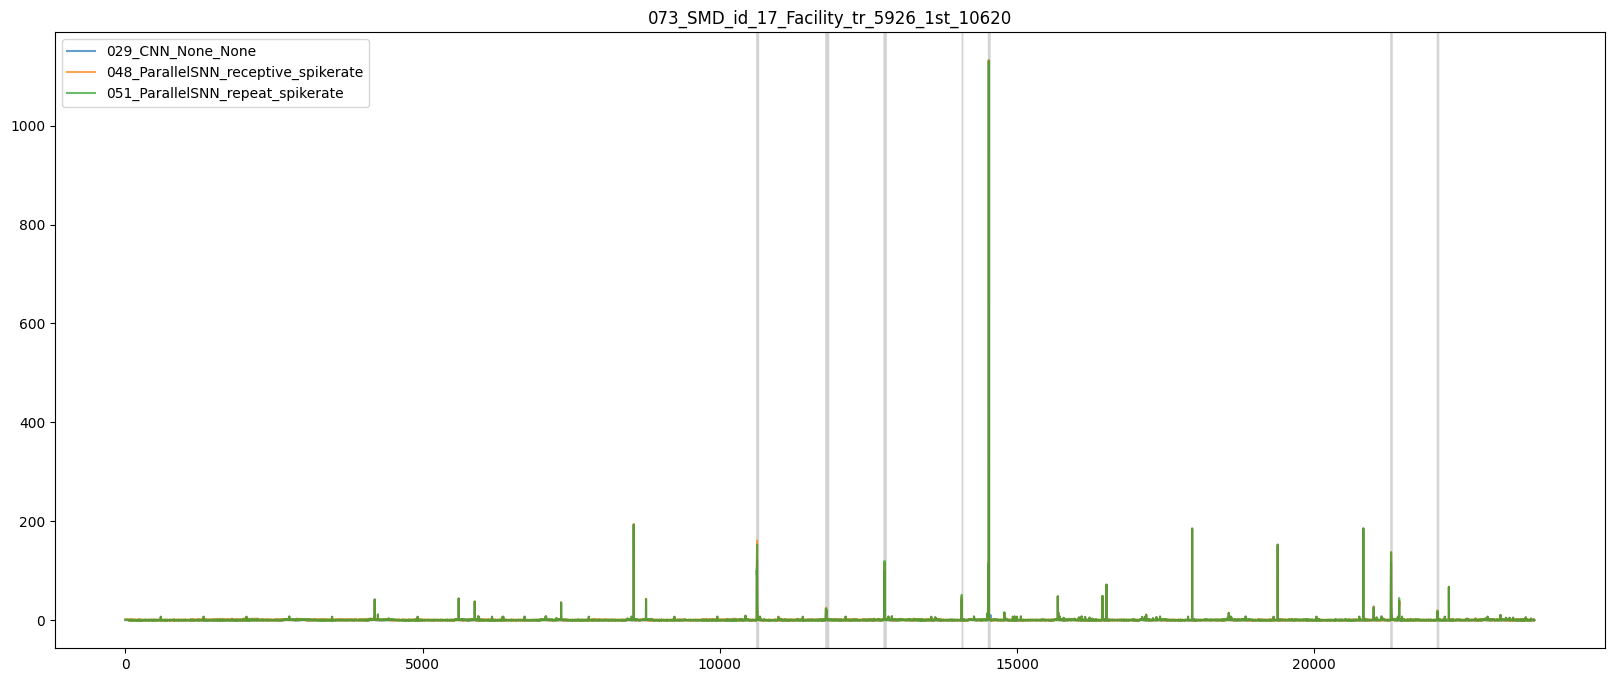

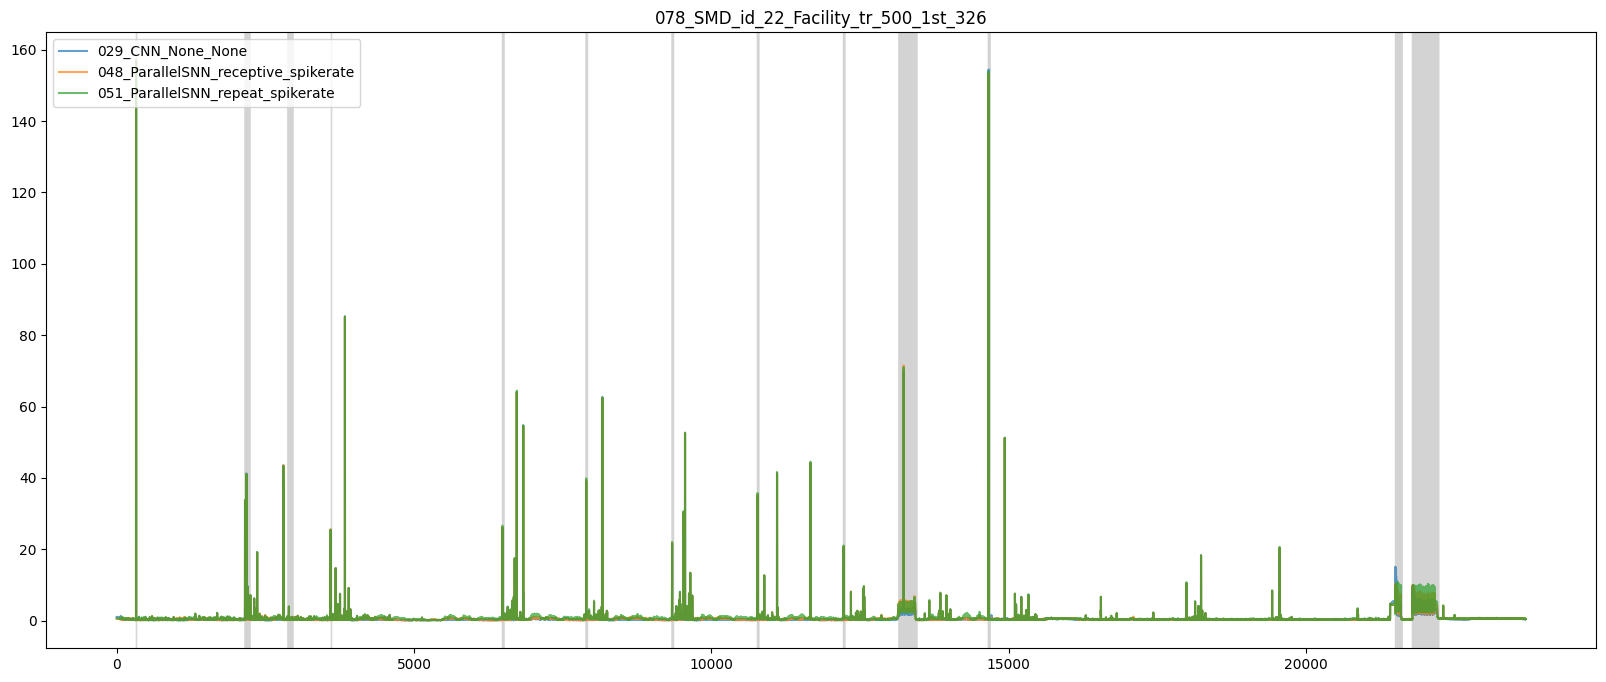

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


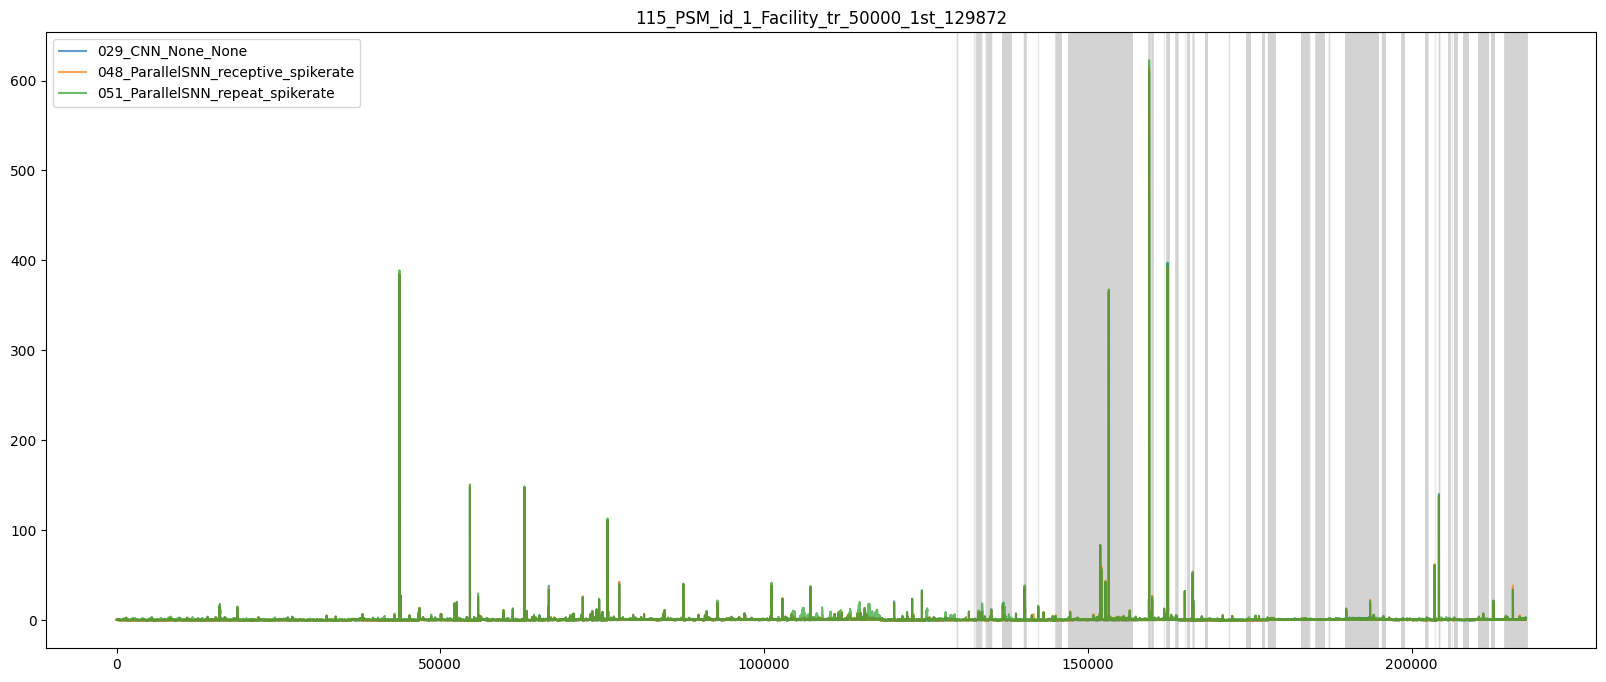

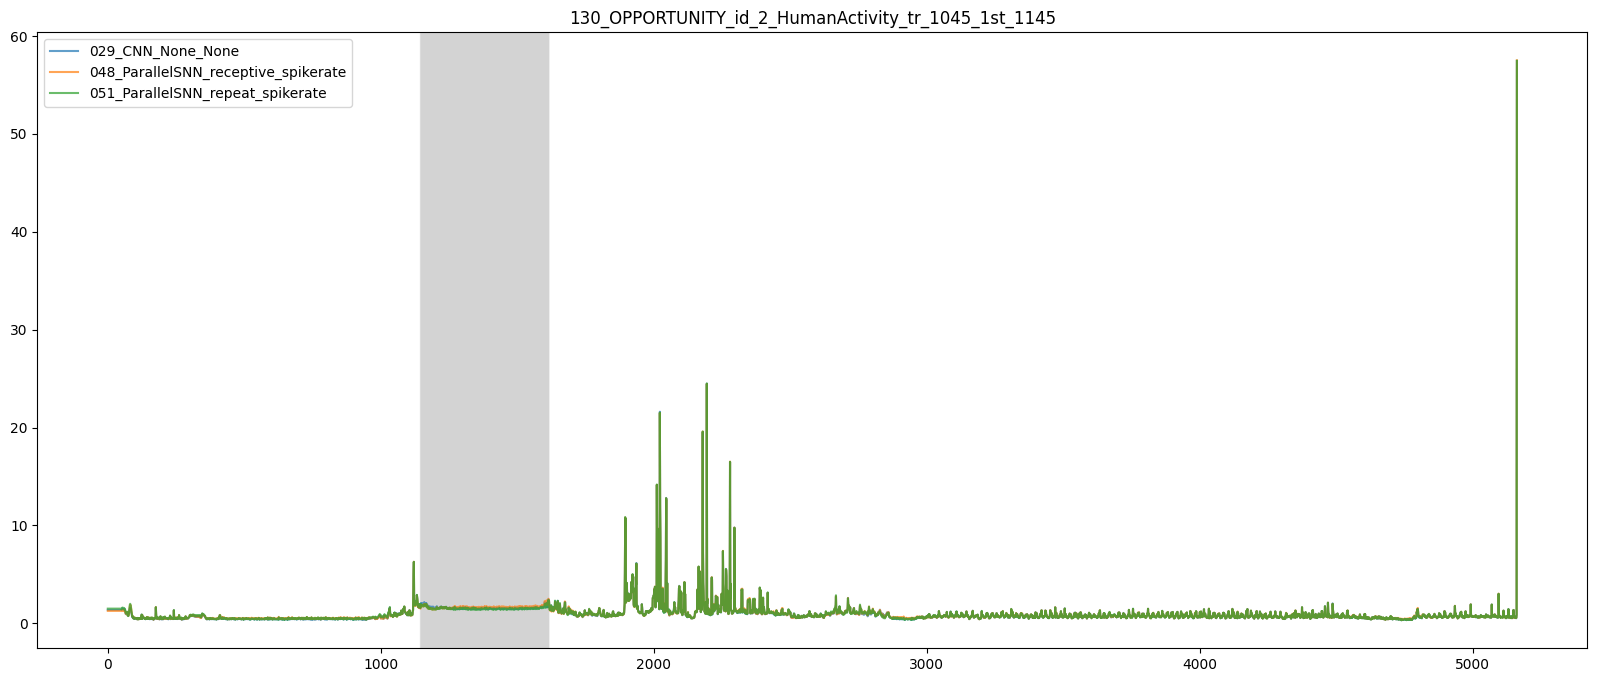

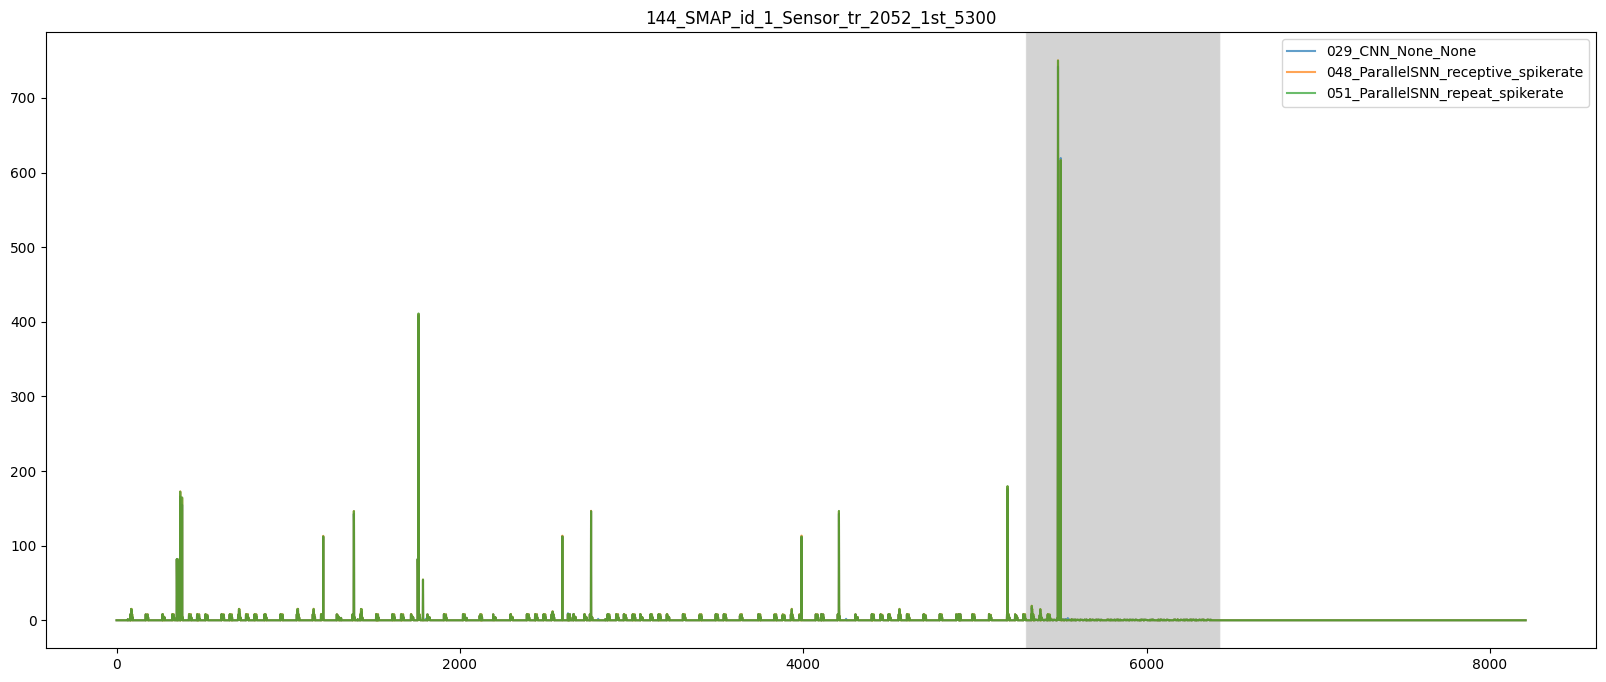

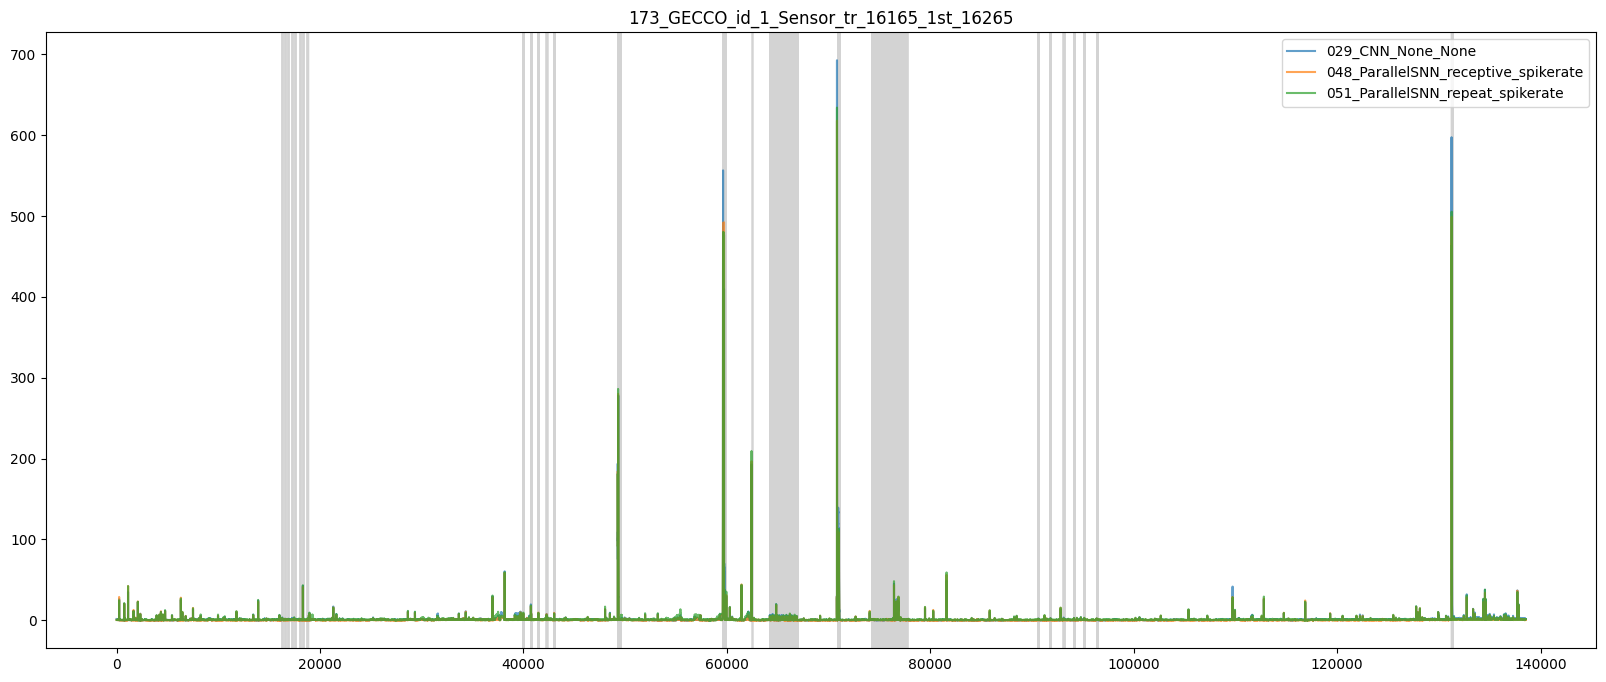

In [84]:
normalize = False
sep = False

for ts_name in keyowrds_to_include_ts:
    plot_wrapper(ts_name, normalize=normalize, sep=sep)